## Load data from csv

In [1]:
# pool_name_ = "ETH-USDT-0.05"
pool_name_ = "USDC-ETH-0.05"
# pool_name_ = "WBTC-ETH-0.05"

In [2]:
import pandas as pd
swap_data_ = pd.read_csv(f"./data/pairs-golden-dataset-dont-fuck-with/{pool_name_}-swap_data.csv")\
    .rename(columns={"Unnamed: 0": "txnIndex"})\
    .set_index("txnIndex")\
    .drop_duplicates()

sandwich_data_ = pd.read_csv(f"./data/pairs-golden-dataset-dont-fuck-with/{pool_name_}-sandwich_data.csv")\
    .rename(columns={"Unnamed: 0": "blockTimestamp"})\
    .set_index("blockTimestamp")\
    .drop_duplicates()

swap_txn_interfaces_ = {
    x.txnHash: x.viaRouter
    for _, x in swap_data_.iterrows()
}


In [3]:
swap_data_.head(2)

,blockTimestamp,blockNumber,logIndex,txnHash,origin,sender,gasUsed,gasPrice,amount0,amount1,...,viaRouter,price0After,price1After,informed,binance_price_token1_pre_block,binance_price_token1_1m_lag,binance_price_token1_5m_lag,binance_price_token1_10m_lag,binance_price_token1_30m_lag,binance_price_token1_60m_lag
txnIndex,,,,,,,,,,,,,,,,,,,,,
0,1.656648e+09,15054304,14,0xdb7f72d403272b8bd35b907fe4f1ddd547083ae0d72a...,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b,0x000000000035b5e5ad9019092c665357240f594e,311559,40018271216,-403619.768287,383.154963,...,0,0.000949,1053.205792,False,1054.85,1053.53,1047.79,1051.59,1052.74,1051.02
1,1.656648e+09,15054304,22,0xe6fedc626e1593f58d4201880a8b3fee0fece3216d84...,0x7717275de7e38ec247b0426ac4fcb22903b7bbcf,0xdef1c0ded9bec7f1a1670819833240f027b25eff,784940,41528271216,-553827.698939,526.615385,...,0x Router,0.000951,1051.190060,False,1054.85,1053.53,1047.79,1051.59,1052.74,1051.02


In [4]:
sandwich_data_.head(2)

,blockNumber,top_bun_txn,meat_txn,bottom_bun_txn,sandwich_revenue,sandwich_cost,sandwich_profit,buns_trader,meat_trader,meat_interface,top_bun_amount0,meat_amount0,bottom_bun_amount0
blockTimestamp,,,,,,,,,,,,,
1.656648e+09,15054304,0xdb7f72d403272b8bd35b907fe4f1ddd547083ae0d72a...,0xe6fedc626e1593f58d4201880a8b3fee0fece3216d84...,0x2f42d1de920679b42ccc139e4aa749ae06907c505380...,-367.035033,854.878833,-1221.913866,0x000000000035b5e5ad9019092c665357240f594e,0xdef1c0ded9bec7f1a1670819833240f027b25eff,0x Router,-403619.768287,-553827.698939,403619.768286
1.656648e+09,15054330,0xc7fa95b84fd61a406b6eab9d69c971c5ed2ea46b99ed...,0xec51b7ce8b3374a91c05e44c45ac7a0ed315cf6a9a53...,0xd13c27950526dead6007187a0fb8dc3e29904f90c1df...,-212.855041,592.394710,-805.249751,0x000000000035b5e5ad9019092c665357240f594e,0x4cb18386e5d1f34dc6eea834bf3534a970a3f8e7,0,-201026.643680,-573280.227166,201026.643679


## Basic Statistics

In [5]:
# basic stats
print(f"There were {len(sandwich_data_)} sandwich attacks.")
print(f"Of all non-front- and back-run transactions, {100* len(sandwich_data_)/(len(swap_data_)-len(sandwich_data_))}% were front- and back-run.")

total_volume_ = swap_data_.amount0.abs().sum()
sandwich_data_["bun_volume"] = (sandwich_data_.top_bun_amount0 - sandwich_data_.bottom_bun_amount0).abs()
sandwich_data_["meat_volume"] = sandwich_data_.meat_amount0.abs()
total_meat_volume_ = sandwich_data_.meat_volume.sum()
total_bun_volume_ = sandwich_data_.bun_volume.sum()
print(f"There was ${total_bun_volume_:<,.2f} of sandwich attack volume.")
print(f"There was ${0.05/100 * total_bun_volume_:<,.2f} of sandwiching fees paid to LPs.")
print(f"There was ${0.05/100 * total_volume_:<,.2f} of total fees paid to LPs.")
print(f"A total of {100*total_bun_volume_/total_volume_:<,.2f}% of swap volume was front- and back-run sandwich transaction volume.")
print(f"A total of {100*total_meat_volume_/total_volume_:<,.2f}% of swap volume was sandwich victim volume.")


There were 3756 sandwich attacks.
Of all non-front- and back-run transactions, 0.2314947497656393% were front- and back-run.
There was $11,534,522,299.90 of sandwich attack volume.
There was $5,767,261.15 of sandwiching fees paid to LPs.
There was $42,341,898.22 of total fees paid to LPs.
A total of 13.62% of swap volume was front- and back-run sandwich transaction volume.
A total of 2.38% of swap volume was sandwich victim volume.


In [6]:
# informedness
proportion_informed = len(swap_data_[swap_data_.informed]) / len(swap_data_); proportion_informed
print(f"Portion of swaps that are informed: {100*proportion_informed:<.2f}%.")

volume_informed_ = sum(swap_data_[swap_data_.informed].amount0.abs()); volume_informed_
volume_total_ = sum(swap_data_.amount0.abs()); volume_total_
proortion_volume_informed_ = volume_informed_/volume_total_
print(f"Portion of swap volume that is informed: {100*proortion_volume_informed_:<.2f}%.")

Portion of swaps that are informed: 30.25%.
Portion of swap volume that is informed: 66.88%.


## Distribution of Uninformed Trades

In [8]:
import numpy as np
uninformed_swaps_ = swap_data_[swap_data_.informed == 0]; uninformed_swaps_
uninformed_swap_sizes_ = uninformed_swaps_.amount0; uninformed_swap_sizes_
uninformed_swap_sizes_sorted_ = uninformed_swap_sizes_.sort_values()

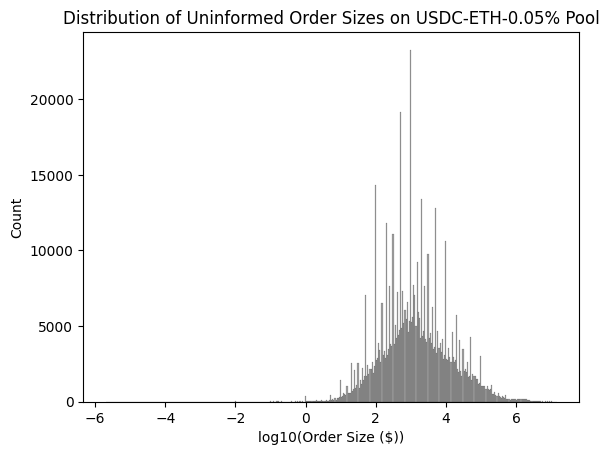

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(uninformed_swap_sizes_sorted_.apply(np.log10), color="grey");
plt.title(f"Distribution of Uninformed Order Sizes on {pool_name_}% Pool");
plt.xlabel("log10(Order Size ($))");

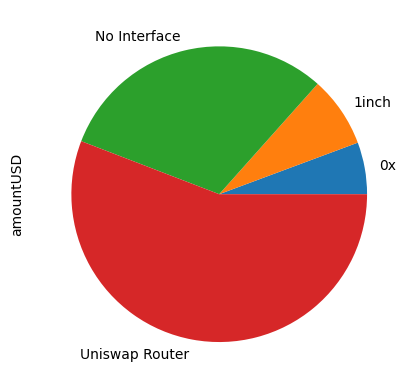

In [10]:
old_to_new = {
    "V3 router 1": "Uniswap Router",
    "V3 router 2": "Uniswap Router",
    "Metamask Router": "MetaMask",
    "1inch Deployer 4": "1inch",
    "1inch V4 Router": "1inch",
    "1inch V5 Router": "1inch",
    "1inch Unlabeled Router": "1inch",
    "0x Router": "0x",
    "0": "No Interface"
}

new_interfaces_ = swap_data_.viaRouter.apply(
    lambda x: old_to_new[x]
)

swap_data_.amountUSD.groupby(new_interfaces_).count().plot.pie();

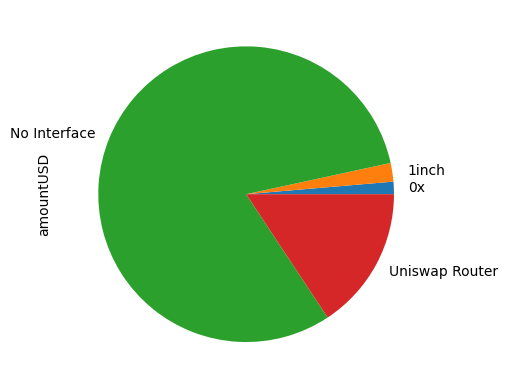

In [11]:
swap_data_.amountUSD.groupby(new_interfaces_).sum().plot.pie();

## What's the deal with routers and aggregators?

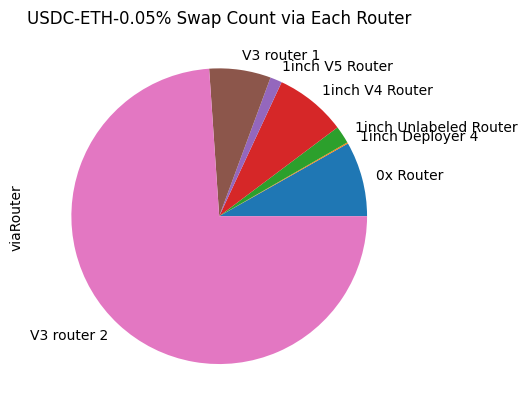

In [12]:
swap_data_.groupby("viaRouter")["viaRouter"].count().drop("0").plot.pie()
swap_data_.groupby("viaRouter")["viaRouter"].count().drop("0")
plt.title(f"{pool_name_}% Swap Count via Each Router");

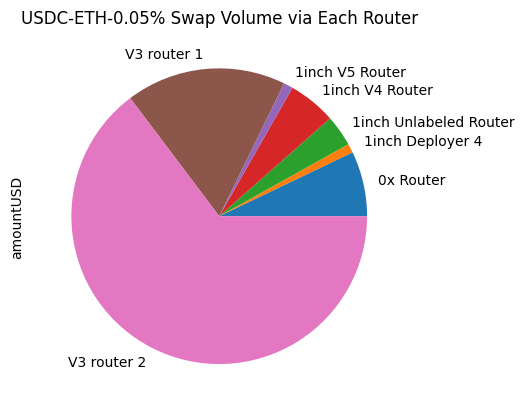

In [13]:
swap_data_.groupby("viaRouter")["amountUSD"].sum().drop("0").plot.pie()
# print(100*swap_data_.groupby("viaRouter")["amountUSD"].sum().drop("0")/swap_data_.amountUSD.sum())
plt.title(f"{pool_name_}% Swap Volume via Each Router");

In [14]:
total_volume_ = swap_data_.amountUSD.sum()

via_no_router_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()["0"].sum()

via_uni_router_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()[
    ["V3 router 1", "V3 router 2"]
].sum()

via_dex_aggregator_ = swap_data_.groupby("viaRouter")["amountUSD"].sum()[
    ["0x Router", "1inch Deployer 4", "1inch Unlabeled Router", "1inch V4 Router", "1inch V5 Router"]
].sum()

print(f"Volume that comes from no known router/interface: {100*via_no_router_ / total_volume_:<.2f}%")
print(f"Volume that comes from the Uniswap Router: {100*via_uni_router_ / total_volume_:<.2f}%.")
print(f"Volume that comes from dex aggregators: {100*via_dex_aggregator_ / total_volume_:<.2f}%.")


Volume that comes from no known router/interface: 80.91%
Volume that comes from the Uniswap Router: 15.70%.
Volume that comes from dex aggregators: 3.39%.


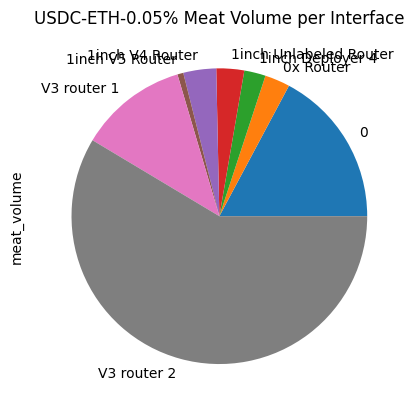

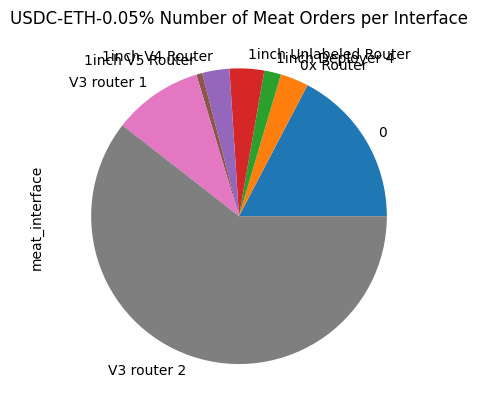

In [15]:
# sandwich volume that comes from each interface
sandwich_data_["meat_interface"] = sandwich_data_.meat_txn.apply(lambda x: swap_txn_interfaces_[x])
sandwich_data_["meat_volume"] = sandwich_data_.meat_amount0.abs()
sandwich_data_.groupby("meat_interface")["meat_volume"].sum().plot.pie()
plt.title(f"{pool_name_}% Meat Volume per Interface")
plt.show();


sandwich_data_.groupby("meat_interface")["meat_interface"].count().plot.pie()
plt.title(f"{pool_name_}% Number of Meat Orders per Interface")
plt.show();


Text(0.5, 1.0, 'Front-/Back-Run Volume to Sandwich Victim Volume Pairs')

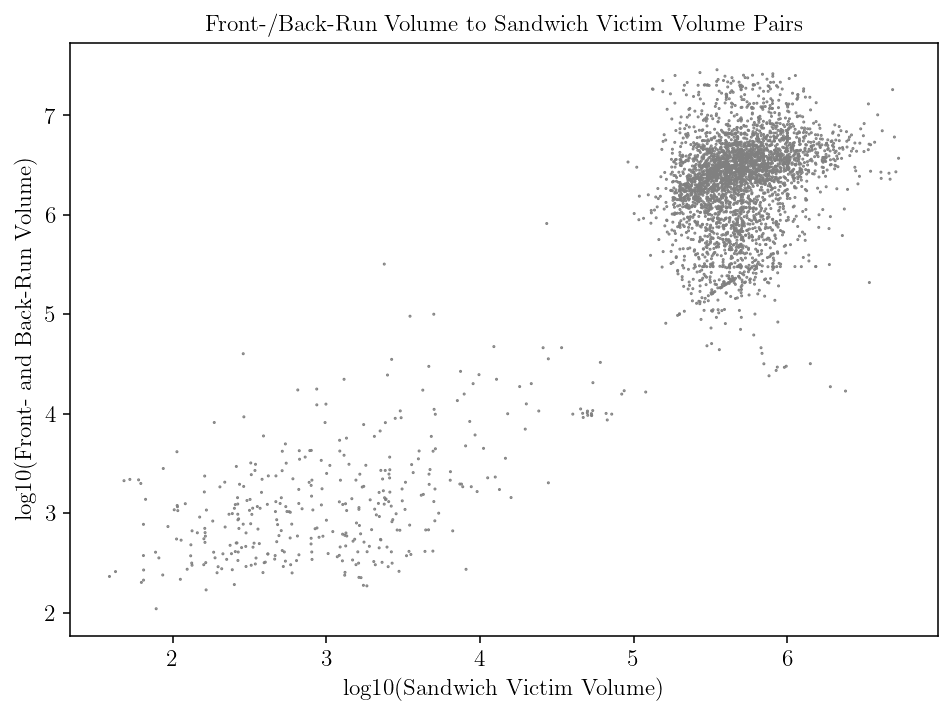

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from latexify import latexify


# df_sorted = sandwich_data_.sort_values("differential")
# df_sorted = sandwich_data_

latexify(fig_width=8, fig_height=5.5)
fig, axs = plt.subplots(1, 1)
axs = [axs]

axs[0].scatter(
    sandwich_data_["meat_volume"].apply(np.log10),
    sandwich_data_["bun_volume"].apply(np.log10),
    color="grey",
    s=[.3]*len(sandwich_data_),
)
axs[0].set_xlabel("log10(Sandwich Victim Volume)")
axs[0].set_ylabel("log10(Front- and Back-Run Volume)")
axs[0].set_title("Front-/Back-Run Volume to Sandwich Victim Volume Pairs")

# largest_n_ = 400
# axs[1].scatter(
#     df_sorted["meat_volume"].iloc[-largest_n_:].apply(np.log10),
#     df_sorted["bun_volume"].iloc[-largest_n_:].apply(np.log10),
#     color="grey",
#     s=[1]*largest_n_,
# )
# axs[1].set_xlabel("log10(Meat Volume)")
# axs[1].set_ylabel("log10(Bun Volume)")
# axs[1].set_title("Bun & Meat Volume Pairs (biggest differential)")


# fig, axs = plt.subplots(1, 2)
# fig.set_size_inches(9, 3)
# fig.set_dpi(150)

# sns.histplot(np.log10(df_sorted["meat_volume"]), color="grey", ax=axs[0])
# axs[1].set_xlabel("log10(Meat Volume)")

# sns.histplot(np.log10(df_sorted["bun_volume"]), color="grey", ax=axs[1])
# axs[1].set_xlabel("log10(Bun Volume)");


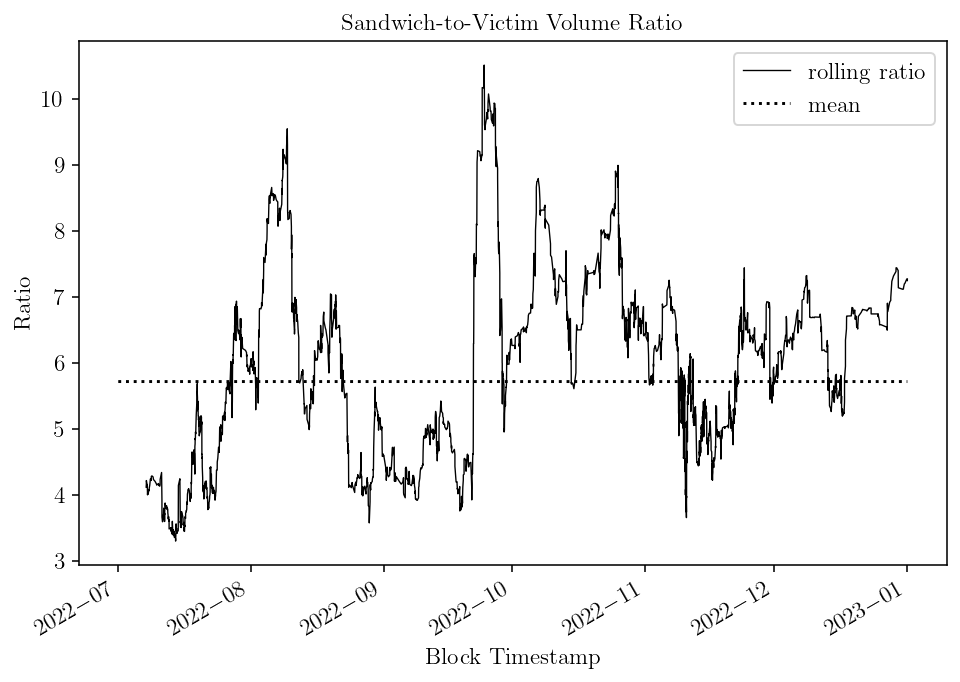

In [20]:
# ratio plot

def calculate_sandwich_volume_multiplier(df, n=100):
    rolling_sums = df[["meat_volume", "bun_volume"]].rolling(n).sum().dropna()
    rolling_sandwich_volume_percentage = rolling_sums["bun_volume"] / rolling_sums["meat_volume"]
    
#     plt.figure(figsize=(5, 2), dpi=200)
    rolling_sandwich_volume_percentage.plot(
        label="rolling ratio",
        linewidth=.7,
        color="black",
    )
    
    overall_ratio = df["bun_volume"].sum() / df["meat_volume"].sum()
    latexify(8, 4.1)
    plt.plot(
        df.index.values,
        [overall_ratio for _ in range(len(df))],
        color="black",
        linestyle="dotted",
        label="mean",
    )
    plt.title("Sandwich-to-Victim Volume Ratio")
    plt.xlabel("Block Timestamp")
    plt.ylabel("Ratio")
    plt.legend();
    plt.savefig("/Users/max/Desktop/rolling.pdf")
    return rolling_sandwich_volume_percentage


totalDf = sandwich_data_.copy()
totalDf.index = pd.to_datetime((totalDf.index*1e9).astype(int))
calculate_sandwich_volume_multiplier(totalDf);